<a href="https://colab.research.google.com/github/https-deeplearning-ai/tensorflow-1-public/blob/version_3/C1/W1/ungraded_lab/C1_W1_Lab_1_hello_world_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ungraded Lab: The Hello World of Deep Learning with Neural Networks

**IMPORTANT NOTE:** This notebook is designed to run as a Colab. Running it on your local machine might result in some of the code blocks throwing errors.

Like every first app, you should start with something super simple that shows the overall scaffolding for how your code works. In the case of creating neural networks, one simple case is where it learns the relationship between two numbers. So, for example, if you were writing code for a function like this, you already know the 'rules':


```
def hw_function(x):
    y = (2 * x) - 1
    return y
```

So how would you train a neural network to do the equivalent task? By using data! By feeding it with a set of x's and y's, it should be able to figure out the relationship between them.

This is obviously a very different paradigm from what you might be used to. So let's step through it piece by piece.

## Imports

Let's start with the imports. Here, you are importing [TensorFlow](https://www.tensorflow.org/) and calling it `tf` for convention and ease of use.

You then import a library called [`numpy`](https://numpy.org) which helps to represent data as arrays easily and to optimize numerical operations.

The framework you will use to build a neural network as a sequence of layers is called [`keras`](https://keras.io/) so you will import that too.

In [ ]:
# Install packages for compatibility

# NOTE: You can safely ignore errors about version incompatibility of
# Colab-bundled packages (e.g. xarray, pydantic, etc.)

!pip install tf-keras==2.15 --quiet
!pip install tensorflow==2.15 --quiet
!pip install keras==2.15 --quiet

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

print(tf.__version__)

2.15.0


## Define and Compile the Neural Network

Next, you will create the simplest possible neural network. It has 1 layer with 1 neuron, and the input shape to it is just 1 value. You will build this model using Keras' [Sequential](https://keras.io/api/models/sequential/) class which allows you to define the network as a sequence of [layers](https://keras.io/api/layers/). You can use a single [Dense](https://keras.io/api/layers/core_layers/dense/) layer to build this simple network as shown below.

In [ ]:
# Build a simple Sequential model
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

Now, you will compile the neural network. When you do so, you have to specify 2 functions: a [loss](https://keras.io/api/losses/) and an [optimizer](https://keras.io/api/optimizers/).

If you've seen lots of math for machine learning, here's where it's usually used. But in this case, it's nicely encapsulated in functions and classes for you. But what happens here? Let's explain...

You know that in the function declared at the start of this notebook, the relationship between the numbers is `y=2x-1`. When the computer is trying to 'learn' that, it makes a guess... maybe `y=10x+10`. The `loss` function measures the guessed answers against the known correct answers and measures how well or how badly it did.

It then uses the `optimizer` function to make another guess. Based on how the loss function went, it will try to minimize the loss. At that point maybe it will come up with something like `y=5x+5`, which, while still pretty bad, is closer to the correct result (i.e. the loss is lower).

It will repeat this for the number of _epochs_ which you will see shortly. But first, here's how you will tell it to use [mean squared error](https://keras.io/api/losses/regression_losses/#meansquarederror-function) for the loss and [stochastic gradient descent](https://keras.io/api/optimizers/sgd/) for the optimizer. You don't need to understand the math for these yet, but you can see that they work!

Over time, you will learn the different and appropriate loss and optimizer functions for different scenarios.

In [ ]:
# Compile the model
model.compile(optimizer='sgd', loss='mean_squared_error')

## Providing the Data

Next up, you will feed in some data. In this case, you are taking 6 X's and 6 Y's. You can see that the relationship between these is `y=2x-1`, so where `x = -1`, `y=-3` etc.

The de facto standard way of declaring model inputs and outputs is to use `numpy`, a Python library that provides lots of array type data structures. You can specify these values by building numpy arrays with [`np.array()`](https://numpy.org/doc/stable/reference/generated/numpy.array.html).

In [ ]:
# Declare model inputs and outputs for training
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

# Training the Neural Network

The process of training the neural network, where it 'learns' the relationship between the x's and y's is in the [`model.fit()`](https://keras.io/api/models/model_training_apis/#fit-method)  call. This is where it will go through the loop we spoke about above: making a guess, measuring how good or bad it is (aka the loss), using the optimizer to make another guess etc. It will do it for the number of `epochs` you specify. When you run this code, you'll see the loss on the right hand side.

In [ ]:
# Train the model
history = model.fit(xs, ys, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 317ms/step - loss: 6.6673
Epoch 2/500
1/1 [==============================] - 0s 7ms/step - loss: 5.4334
Epoch 3/500
1/1 [==============================] - 0s 6ms/step - loss: 4.4588
Epoch 4/500
1/1 [==============================] - 0s 5ms/step - loss: 3.6883
Epoch 5/500
1/1 [==============================] - 0s 5ms/step - loss: 3.0783
Epoch 6/500
1/1 [==============================] - 0s 7ms/step - loss: 2.5948
Epoch 7/500
1/1 [==============================] - 0s 7ms/step - loss: 2.2109
Epoch 8/500
1/1 [==============================] - 0s 7ms/step - loss: 1.9053
Epoch 9/500
1/1 [==============================] - 0s 6ms/step - loss: 1.6615
Epoch 10/500
1/1 [==============================] - 0s 6ms/step - loss: 1.4664
Epoch 11/500
1/1 [==============================] - 0s 6ms/step - loss: 1.3096
Epoch 12/500
1/1 [==============================] - 0s 6ms/step - loss: 1.1830
Epoch 13/500
1/1 [==============================] - 0s 6ms/

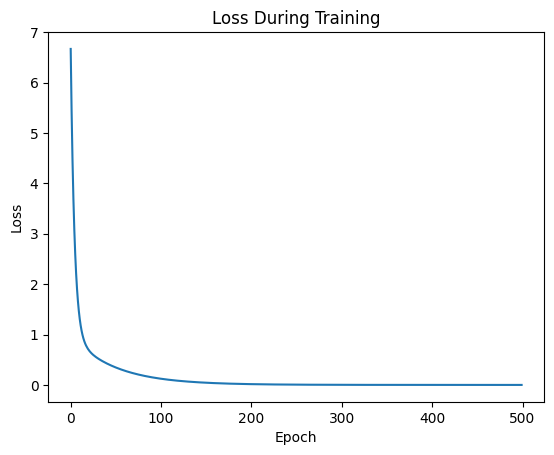

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Ok, now you have a model that has been trained to learn the relationship between `x` and `y`. You can use the [`model.predict()`](https://keras.io/api/models/model_training_apis/#predict-method) method to have it figure out the `y` for a previously unknown `x`. So, for example, if `x=10`, what do you think `y` will be? Take a guess before you run this code:

In [ ]:
# Make a prediction
print(model.predict([10.0]))

1/1 [==============================] - 0s 124ms/step
[[18.983757]]


You might have thought `19`, right? But it ended up being a little under. Why do you think that is?

Remember that neural networks deal with probabilities. So given the data that we fed the model with, it calculated that there is a very high probability that the relationship between `x` and `y` is `y=2x-1`, but with only 6 data points we can't know for sure. As a result, the result for 10 is very close to 19, but not necessarily 19.

As you work with neural networks, you'll see this pattern recurring. You will almost always deal with probabilities, not certainties, and will do a little bit of coding to figure out what the result is based on the probabilities, particularly when it comes to classification.
